In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as mh
from scipy.stats import multivariate_normal
import matplotlib.gridspec as gridspec
from numpy import linalg as LA

# Bayesian Classification Q3 part A : : Same Covariance Matrix for all the classes

In [10]:
def contours_and_surface(mean1, mean2, mean3, cov_matrix1, cov_matrix2, cov_matrix3, positive_limit, number_of_points):
    p1 = np.zeros((number_of_points, number_of_points))
    p2 = np.zeros((number_of_points, number_of_points))
    p3 = np.zeros((number_of_points, number_of_points))

    x = np.linspace(-positive_limit, positive_limit, number_of_points)
    y = np.linspace(-positive_limit, positive_limit, number_of_points)

    X, Y = np.meshgrid(x, y)
    norm = (number_of_points - 1)/(2 * positive_limit)
    
    for i in range(0, len(x)): 
        for j in range(0, len(y)):
            p1[i, j] = multivariate_normal.pdf([(i-len(x)//2)/norm, (j-len(y)//2)/norm], mean1, cov_matrix1)
            p2[i, j] = multivariate_normal.pdf([(i-len(x)//2)/norm, (j-len(y)//2)/norm], mean2, cov_matrix2)
            p3[i, j] = multivariate_normal.pdf([(i-len(x)//2)/norm, (j-len(y)//2)/norm], mean3, cov_matrix3)

    fig = plt.figure(figsize=[15, 10])
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
    
    ax1 = plt.subplot(gs[0])

    c1 = ax1.contour(Y, X, p1, 10, alpha = 1, cmap = 'cool')
    c2 = ax1.contour(Y, X, p2, 10, alpha = 1, cmap = 'cubehelix_r')
    c3 = ax1.contour(Y, X, p3, 10, alpha = 1, cmap = 'Reds')
    
    ax2 = plt.subplot(gs[1], projection='3d')
    p = np.zeros((number_of_points, number_of_points))
    
    for i in range(number_of_points):
        for j in range(number_of_points):

            if p1[i, j] >= p2[i, j] and p1[i, j] >= p3[i, j]:
                p[i, j] = p1[i, j]

            elif p2[i, j] >= p3[i, j] and p2[i, j] >= p1[i, j]:
                p[i, j] = p2[i, j]

            else:
                p[i, j] = p3[i, j]
                
    s4 = ax2.plot_surface(X, Y, p, alpha = 1, cmap = 'hot_r')
    ax2.view_init(elev = 25, azim  = 60)

# Splitting of Training and Testing Data

In [11]:
data_set = open('/content/drive/MyDrive/PA_1/Dataset For Q3.txt')

df = []
for i in data_set:
    df.append(i.strip().split(' '))
    
class1_train = df[0:350]
class1_test = df[350:500]

class2_train = df[500:850]
class2_test = df[850:1000]

class3_train = df[1000:1350]
class3_test = df[1350:1500]

f1 = [df[i][0] for i in range(1500)]
f2 = [df[i][1] for i in range(1500)]

f1 = np.array(f1).astype(float)
f2 = np.array(f2).astype(float)
print(f1,f2)

[ 1.0778  1.6173  3.3376 ...  5.501  10.555  13.632 ] [ 0.86111  0.94568  1.565   ... -7.8802  -6.9118  -7.0422 ]


# Mean, Covariance

In [14]:
mean11 = np.average(f1[0:350])
mean12 = np.average(f2[0:350])
mean1 = np.array([mean11, mean12])

mean21 = np.average(f1[500:850])
mean22 = np.average(f2[500:850])
mean2 = np.array([mean21, mean22])

mean31 = np.average(f1[1000:1350])
mean32 = np.average(f2[1000:1350])
mean3 = np.array([mean31, mean32])

cov_matrix = np.cov(f1, f2)




In [15]:
class1_test = np.array(class1_test).astype(float)
class2_test = np.array(class2_test).astype(float)
class3_test = np.array(class3_test).astype(float)

test = np.concatenate((class1_test, class2_test, class3_test))

results = []

for i in test:
    prob1 = multivariate_normal.pdf(i, mean1, cov_matrix)
    prob2 = multivariate_normal.pdf(i, mean2, cov_matrix)
    prob3 = multivariate_normal.pdf(i, mean3, cov_matrix)
    
    if prob1 > prob2 and prob1 > prob3:
        results.append(1)
        
    elif prob2 > prob1 and prob2 > prob3:
        results.append(2)
        
    elif prob3 > prob1 and prob3 > prob2:
        results.append(3)

print(prob1,prob2)

0.0001115175118315912 0.0002745120128617953


# Accuracy

In [16]:
count = 0
for i in range(450):
    if i < 150 and results[i] == 1:
        count += 1  
    elif i >= 150 and i < 300 and results[i] == 2:
        count += 1   
    elif i >= 300 and results[i] == 3:
        count += 1
        
print(f'Accuracy = {100*count/450}%')

Accuracy = 99.77777777777777%


# Plot

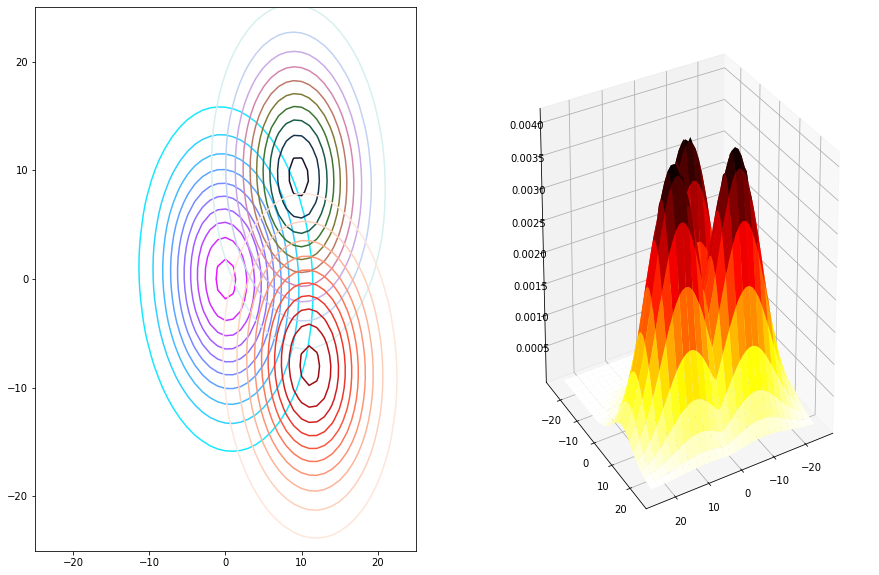

In [17]:
contours_and_surface(mean1, mean2, mean3, cov_matrix, cov_matrix, cov_matrix, 25, 51)

In [20]:

eigen_values,eigen_vectors=LA.eig(cov_matrix)
eigen_vectors

array([[-0.99450745,  0.10466577],
       [-0.10466577, -0.99450745]])

In [21]:
eig_1=eigen_vectors[:,0]
eig_2=eigen_vectors[:,1]

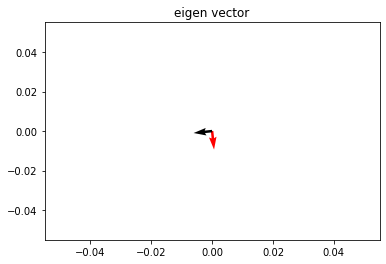

In [22]:
plt.quiver(*eig_2, color=['r'])
plt.quiver(*eig_1, color=['k'])
plt.title('eigen vector')
plt.show()

# Q3 - Part 2 : Different Covariance Matrices

In [23]:
cov_matrix1 = np.cov(f1[0:350], f2[0:350])
cov_matrix2 = np.cov(f1[500:850], f2[500:850])
cov_matrix3 = np.cov(f1[1000:1350], f2[1000:1350])

results1 = []
for i in test:
    prob1 = multivariate_normal.pdf(i, mean1, cov_matrix1)
    prob2 = multivariate_normal.pdf(i, mean2, cov_matrix2)
    prob3 = multivariate_normal.pdf(i, mean3, cov_matrix2)
    
    if prob1 > prob2 and prob1 > prob3:
        results1.append(1)    
    elif prob2 > prob1 and prob2 > prob3:
        results1.append(2)    
    elif prob3 > prob1 and prob3 > prob2:
        results1.append(3)

In [24]:
count = 0
for i in range(450):
    if i < 150 and results1[i] == 1:
        count += 1  
    elif i >= 150 and i < 300 and results1[i] == 2:
        count += 1
    elif i >= 300 and results1[i] == 3:
        count += 1
        
print(f'Accuracy = {100*count/450}%')

Accuracy = 100.0%


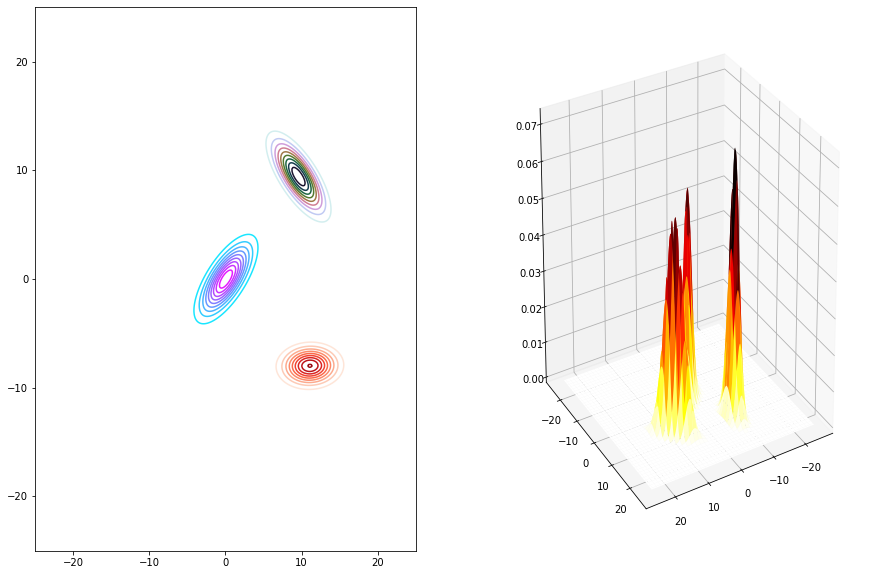

In [25]:
contours_and_surface(mean1, mean2, mean3, cov_matrix1, cov_matrix2, cov_matrix3, 25, 401)

In [26]:
def eigenplot(covar):
    from numpy import linalg as linal
    eigen_values,eigen_vectors=linal.eig(covar)
    
    eig_1=eigen_vectors[:,0]
    eig_2=eigen_vectors[:,1]
    
    plt.quiver( *eig_1, color=['r'],scale=5)
    plt.quiver( *eig_2, color=['k'],scale=5)
    plt.title('eigen vector')
    plt.show()

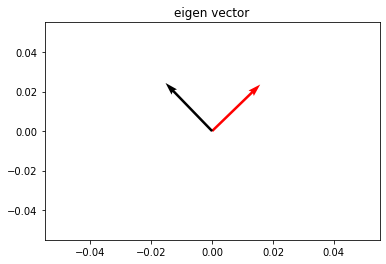

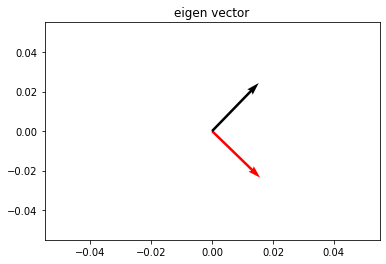

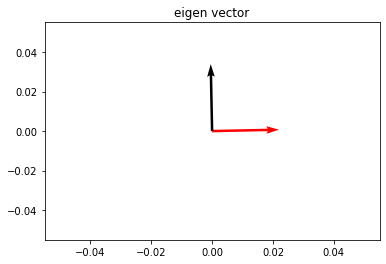

In [29]:
eigenplot(cov_matrix1)
eigenplot(cov_matrix2)
eigenplot(cov_matrix3)

# Q3 part 3 : Diagonal Covariance Matrices

In [30]:
diagonal = [[1, 0], [0, 1]]

cov_diagonal1 = cov_matrix1 * diagonal
cov_diagonal2 = cov_matrix2 * diagonal
cov_diagonal3 = cov_matrix3 * diagonal

results2 = []
for i in test:
    prob1 = multivariate_normal.pdf(i, mean1, cov_diagonal1)
    prob2 = multivariate_normal.pdf(i, mean2, cov_diagonal2)
    prob3 = multivariate_normal.pdf(i, mean3, cov_diagonal3)
    
    if prob1 > prob2 and prob1 > prob3:
        results2.append(1)   
    elif prob2 > prob1 and prob2 > prob3:
        results2.append(2)    
    elif prob3 > prob1 and prob3 > prob2:
        results2.append(3)

In [31]:
count = 0
for i in range(450):
    if i < 150 and results2[i] == 1:
        count += 1   
    elif i >= 150 and i < 300 and results2[i] == 2:
        count += 1   
    elif i >= 300 and results2[i] == 3:
        count += 1
        
print(f'Accuracy = {100*count/450}%')

Accuracy = 99.77777777777777%


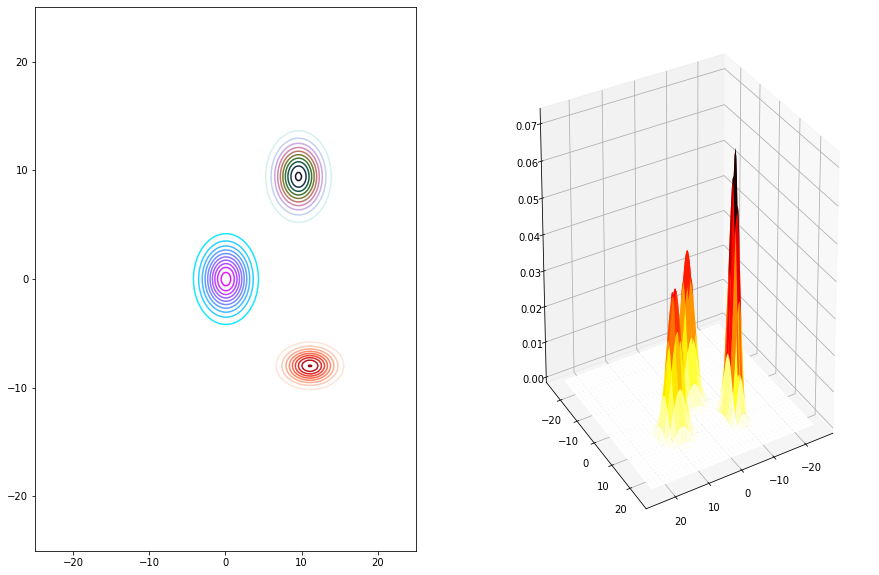

In [32]:
contours_and_surface(mean1, mean2, mean3, cov_diagonal1, cov_diagonal2, cov_diagonal3, 25, 201)

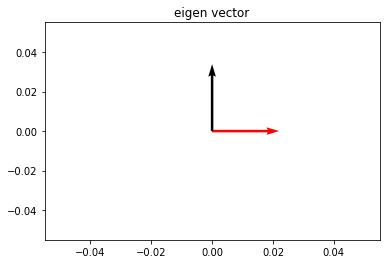

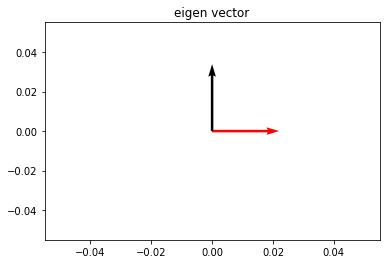

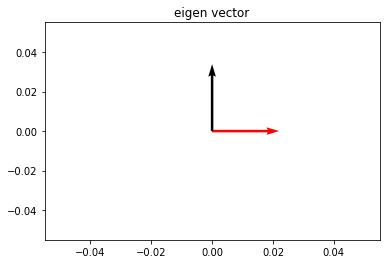

In [33]:
eigenplot(cov_diagonal1)
eigenplot(cov_diagonal2)
eigenplot(cov_diagonal3)